In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from data import * # data contains dataloader and data manipulation functions
from train import * # train network  functions
from networks import * # autoencoder class and weight initializations 
from visualisation import * #plotting and visualization functions
from train_clust import * #gmm and  clustering functions
import matplotlib as mpl                                         #######################################
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch                   # plotting and visulaization packages
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes     #######################################
from cuml import TSNE                                            # TSNE computaion is much faster than sklearns, cuml uses gpu
torch.set_default_dtype(torch.float64)                           # use larger data  type sizes to avoid underflow issues 
#device = torch.device('cuda')
dataset = H5SeismicDataset(                                     
    filepath="/datasets/ee228-sp21-A00-public/RIS_Seismic-001.h5",# load the dataset and transform spectragrams to tensors 
    transform = transforms.Compose(
        [SpecgramShaper(), SpecgramToTensor()]
    )
)

dataloaders = getDataloaderSplit(dataset, 0.2,0.1)                # using 70%, 20%, 10%, train, val, test split 

In [2]:
#Use a saved model
USE_SAVED=False
if USE_SAVED:
    PATH='./saved_models/AEC/state_dict_AEC.pt'
    PATH1='./saved_models/AEC/test_lr001_epochs10.pt'

    #model = AEC()
    #model.load_state_dict(torch.load(PATH))
    model = torch.load(PATH1)
    model.eval()
    #clustTrain(model,dataloaders)
else:
    device = torch.device('cuda')
    model = UNET()
    model.to(device)
    params={'lr':.00001,'epochs':3,}
    outputs = pretrain(model= model,dataloaders=dataloaders,device=device,lr=params['lr'], epochs=params['epochs'], absoluteLossThresh = 0.0032)

epoch:   0  train loss:  tensor(0.1027)
epoch:   0  train loss:  tensor(0.0072)
epoch:   0  train loss:  tensor(0.0004)
epoch:   0  train loss:  tensor(0.0002)
epoch:   0  train loss:  tensor(0.0001)
epoch:   0  train loss:  tensor(8.3598e-05)
epoch:   0  val loss:  tensor(8.1417e-05)
epoch:   0  val loss:  tensor(7.4362e-05)

train loss tensor(0.0060) val_loss  tensor(7.6807e-05)

epoch:   1  train loss:  tensor(6.6301e-05)
epoch:   1  train loss:  tensor(6.5301e-05)
epoch:   1  train loss:  tensor(5.1758e-05)
epoch:   1  train loss:  tensor(4.9545e-05)
epoch:   1  train loss:  tensor(4.1226e-05)
epoch:   1  train loss:  tensor(3.5852e-05)
epoch:   1  val loss:  tensor(3.2022e-05)
epoch:   1  val loss:  tensor(2.9191e-05)

train loss tensor(4.9230e-05) val_loss  tensor(3.0847e-05)

epoch:   2  train loss:  tensor(2.7759e-05)
epoch:   2  train loss:  tensor(2.2067e-05)
epoch:   2  train loss:  tensor(1.3733e-05)
epoch:   2  train loss:  tensor(6.8019e-06)
epoch:   2  train loss:  tenso

504 504


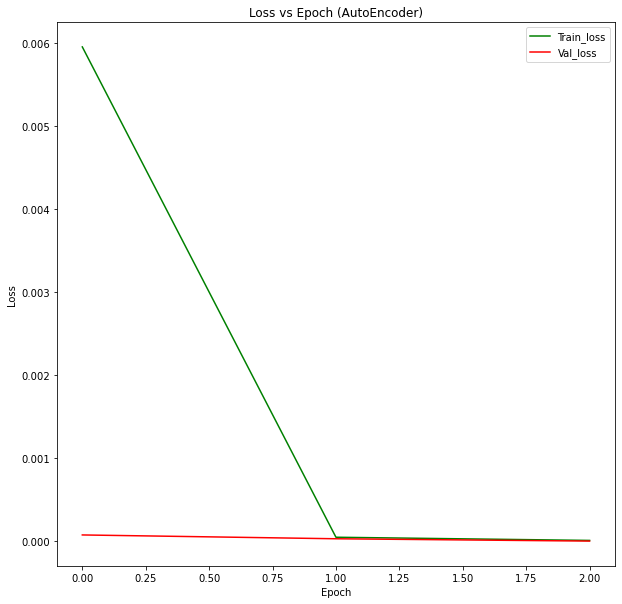

In [3]:
get_graphs(outputs[1],outputs[0],'./saved_models/UNET/u_net_loss_fig_iterations.png')
print(len(outputs[3]),len(outputs[4]))

In [ ]:
z_array = getLatentFeatureSpaceDataset(model, dataloaders[0], double=True)

In [ ]:
model.to(torch.device('cpu'))
model = clustTrain(model,latentSpaceArray=z_array)
#a total of 580 indexes is expected

In [ ]:
labels = model.gmm.predict(z_array)

In [ ]:
tsne_Z = tsne(z_array)

In [ ]:
out = view_TSNE(tsne_Z,labels,"TSNE on GMM",True)

In [ ]:
PATH='./saved_models/UNET/UNET_state_dict.pt'
torch.save(model.state_dict(), PATH)